<a href="https://colab.research.google.com/github/Bohdan-at-Kulinich/Machine-Learning/blob/main/Convnets_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introductions to convnets: 

In [1]:
# Initiating a small convnet: 

from tensorflow import keras 
from tensorflow.keras import layers 

In [2]:
inputs = keras.Input(shape=(28, 28, 1))  # image height, width, channels

x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)

outputs = layers.Dense(10, activation='softmax')(x) 

model = keras.Model(inputs=inputs, outputs=outputs) 

In [3]:
# model summary: 

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [4]:
# Training the convnet on MNIST images:

from tensorflow.keras.datasets import mnist 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

train_images = train_images.reshape((60000, 28 ,28, 1))
train_images = train_images.astype('float32') / 255 
test_images = test_images.reshape((10000, 28 ,28, 1))
test_images = test_images.astype('float32') / 255 

model.compile( 
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_images, train_labels, 
          epochs=5, 
          batch_size=64) 



11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 13s 5ms/step - loss: 0.1533 - accuracy: 0.9522
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0447 - accuracy: 0.9862
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0308 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0235 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0186 - accuracy: 0.9943


In [5]:
# Evaluating the convnet: 

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0297 - accuracy: 0.9916
Test accuracy: 0.992


### Training convnet from scratch on a small dataset: 

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bohdanbogdan","key":"efafdce72df67dd856188c35be93d761"}'}

In [7]:
!mkdir ~/.kaggle

In [8]:
!cp kaggle.json ~/.kaggle/

In [9]:
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle competitions download -c dogs-vs-cats

 99% 803M/812M [00:03<00:00, 210MB/s]
100% 812M/812M [00:03<00:00, 234MB/s]


In [13]:
!unzip -qq dogs-vs-cats.zip

In [14]:
!unzip -qq train.zip

In [15]:
# Copying images to training, validation, and test directories: 

import os, shutil, pathlib
  
original_dir = pathlib.Path("train")                          
new_base_dir = pathlib.Path("cats_vs_dogs_small")            
 
def make_subset(subset_name, start_index, end_index):         
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" 
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
  
make_subset("train", start_index=0, end_index=1000)           
make_subset("validation", start_index=1000, end_index=1500)   
make_subset("test", start_index=1500, end_index=2500)  

In [17]:
# Building the model: 

# Instantiating a small convnet for dogs vs. cats classification: 

from tensorflow import keras 
from tensorflow.keras import layers 

inputs = keras.Input(shape=(180, 180, 3))  # RGB images of size 180x180

x = layers.Rescaling(1./255)(inputs) 

x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x) 
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)

x = layers.Flatten()(x) 

outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs) 

In [18]:
# Configuring the model for training: 

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

In [20]:
# Data preprocesing: 

# using image_dataset_from_directory to read images: 

from tensorflow.keras.utils import image_dataset_from_directory 

train_dataset = image_dataset_from_directory( 
    new_base_dir / 'train', 
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory( 
    new_base_dir / 'validation', 
    image_size=(180, 180), 
    batch_size=32
)

test_dataset = image_dataset_from_directory( 
    new_base_dir / 'test', 
    image_size=(180, 180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [21]:
# Displaying the shapes of the data and labels yielding by the Dataset: 

for data_batch, labels_batch in train_dataset: 
  print('data batch shape:', data_batch.shape)
  print('labels batch shape: ', labels_batch.shape)
  break 

data batch shape: (32, 180, 180, 3)
labels batch shape:  (32,)


In [22]:
# Fitting the model using a Dataset: 

callbacks = [ 
    keras.callbacks.ModelCheckpoint( 
        filepath='convnet_from_scratch.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

history = model.fit( 
    train_dataset, 
    epochs=30, validation_data=validation_dataset, 
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 8s 88ms/step - loss: 0.8088 - accuracy: 0.5355 - val_loss: 0.6766 - val_accuracy: 0.5740
Epoch 2/30
63/63 [==============================] - 5s 76ms/step - loss: 0.6871 - accuracy: 0.5755 - val_loss: 0.6980 - val_accuracy: 0.5220
Epoch 3/30
63/63 [==============================] - 5s 77ms/step - loss: 0.6539 - accuracy: 0.6125 - val_loss: 0.7047 - val_accuracy: 0.5940
Epoch 4/30
63/63 [==============================] - 5s 79ms/step - loss: 0.6275 - accuracy: 0.6620 - val_loss: 0.5964 - val_accuracy: 0.6700
Epoch 5/30
63/63 [==============================] - 5s 78ms/step - loss: 0.5715 - accuracy: 0.7045 - val_loss: 0.5883 - val_accuracy: 0.7000
Epoch 6/30
63/63 [==============================] - 5s 77ms/step - loss: 0.5464 - accuracy: 0.7240 - val_loss: 0.6214 - val_accuracy: 0.6800
Epoch 7/30
63/63 [==============================] - 6s 85ms/step - loss: 0.4956 - accuracy: 0.7565 - val_loss: 0.5715 - val_accuracy: 0.7240
Epoch 8/30
63

In [23]:
# Evaluating the model on the test set: 

test_model = keras.models.load_model('convnet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)

print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 42ms/step - loss: 0.6100 - accuracy: 0.6995
Test accuracy: 0.700


### Leveraging a pretrained model: 

In [25]:
# Feature extraction with a pretrained model: 

# Instantiating the VGG16 convolutional base: 

conv_base = keras.applications.vgg16.VGG16( 
    weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [26]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [27]:

# Extracting the VGG16 feature and corresponding labels: 

import numpy as np 

def get_features_and_labels(dataset):
  all_features = []
  all_labels = [] 
  for images, labels in dataset: 
    preprocessed_images = keras.applications.vgg16.preprocess_input(images) 
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels) 

train_features, train_labels = get_features_and_labels(train_dataset) 
val_features, val_labels = get_features_and_labels(validation_dataset) 
test_features, test_labels = get_features_and_labels(test_dataset) 

1/1 [==============================] - 0s 24ms/step


In [28]:
train_features.shape

(2000, 5, 5, 512)

In [ ]:
# Defining and training the densely connected classifier: 

inputs = keras.Input(shape=(5, 5, 512)) 

x = layers.Flatten()(inputs) 
x = layers.Dense(256)(x) 
x = layers.Dropout(0.5)(x) 

outputs = layers.Dense(1, activation='sigmoid')(x) 

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

callbacks = [ 
    keras.callbacks.ModelCheckpoint( 
        filepath = 'feature_extraction.keras', 
        save_best_only=True, 
        monitor='val_loss'
    )
]

history = model.fit( 
    train_features, train_labels, 
    epochs=20, 
    validation_data=(val_features, val_labels),
    callbacks=callbacks
) 

In [30]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)               
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
  
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 19.9963 - accuracy: 0.9190 - val_loss: 3.4831 - val_accuracy: 0.9660
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 2.7682 - accuracy: 0.9795 - val_loss: 4.2325 - val_accuracy: 0.9700
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 2.7761 - accuracy: 0.9785 - val_loss: 5.8087 - val_accuracy: 0.9720
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 1.3342 - accuracy: 0.9930 - val_loss: 5.9632 - val_accuracy: 0.9650
Epoch 5/20
63/63 [==============================] - 0s 8ms/step - loss: 1.3844 - accuracy: 0.9885 - val_loss: 7.7188 - val_accuracy: 0.9630
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.8904 - accuracy: 0.9905 - val_loss: 5.2355 - val_accuracy: 0.9740
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.6840 - accuracy: 0.9955 - val_loss: 5.5910 - val_accuracy: 0.9720
Epoch 8/20
63/63 [

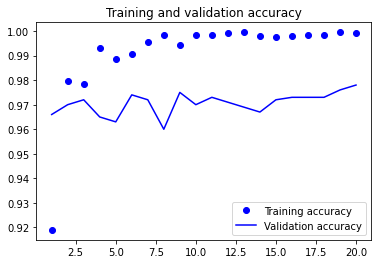

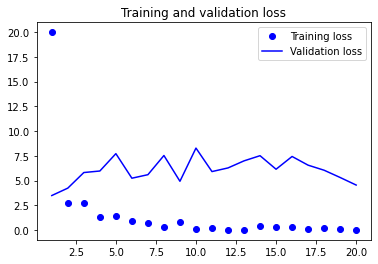

In [31]:
# Plotting the results: 

import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()